person nr. 1
person nr. 4
person nr. 7
person nr. 10
person nr. 13
person nr. 16
person nr. 19
person nr. 2
person nr. 8
person nr. 11
person nr. 17
person nr. 20
person nr. 24
person nr. 25
person nr. 3
person nr. 6
person nr. 9
person nr. 12
person nr. 15
person nr. 18
person nr. 21


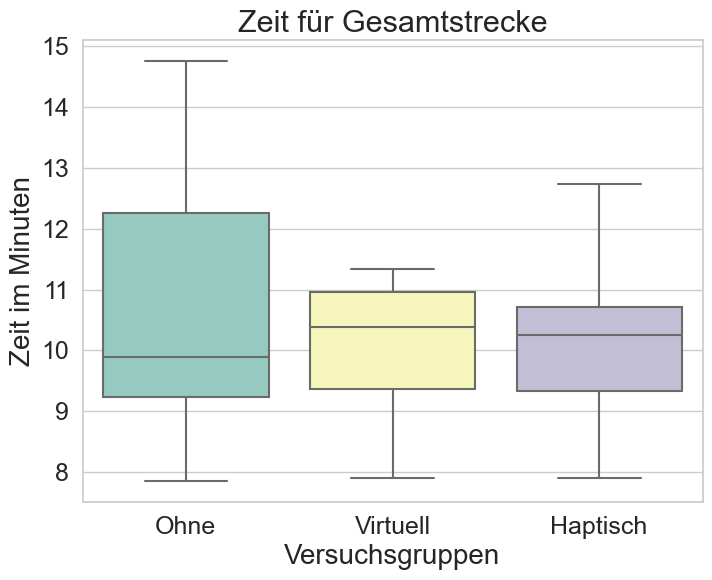

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped on bridge 1)
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)

def visualizeTotalTime(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))

    sns.boxplot(data=data, palette="Set3")
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'], fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.xlabel("Versuchsgruppen", fontsize = fontsizeLabel)
    plt.ylabel("Zeit im Minuten", fontsize = fontsizeLabel)
    plt.title("Zeit für Gesamtstrecke", fontsize = fontsizeHeader)
    plt.savefig('../Visualisierungen/gesamtzeiten.png', dpi=300)
    plt.show()

def analyseTimeToComplete(ids):
    timestocomplete = []
    for n in ids:
        print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        starttime = df['TimeStamp_Unix'].min()
        endtime = df['TimeStamp_Unix'].max()
        
        timetocomplete = endtime - starttime
        timestocomplete.append(timetocomplete / 60)
    return timestocomplete

timesref = analyseTimeToComplete(idsReference)
timesvirt = analyseTimeToComplete(idsVirtual)
timeshapt = analyseTimeToComplete(idsHaptic)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTotalTime(timedf)

[81, 50, 53, 55, 78, 68, 45, nan]
[58, 68, 51, 84, 48, 72, 76, 72]
[65, 67, 57, 78, 59, 49, 64, 67]


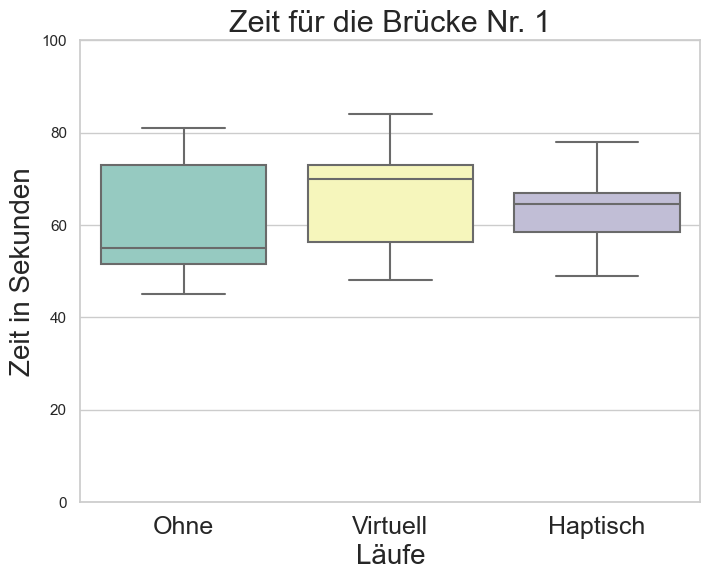

[96, 63, 63, 72, 87, 80, 56, nan]
[81, 72, 70, 85, 60, 84, 72, 79]
[84, 96, 72, 83, 73, 59, 76, 81]


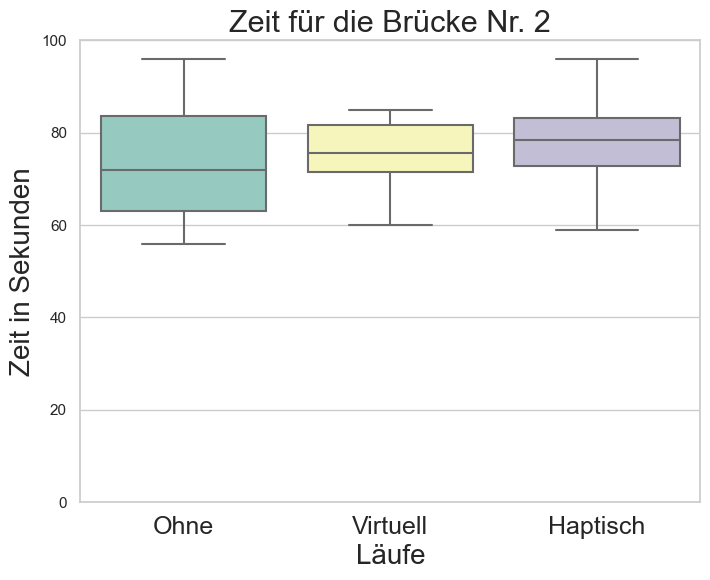

[18, 18, 14, 15, 17, 19, 12]
[17, 14, 44, 28, 16, 15, 17]
[15, 17, 16, 18, 15, 29, 14]


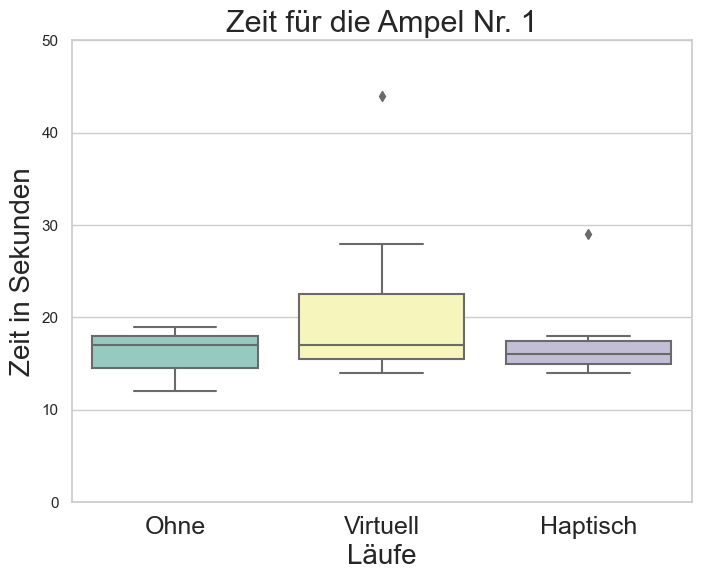

[20, 13, 13, 25, 21, 18, 13]
[13, 13, 19, 11, 16, 15, 33]
[15, 16, 13, 17, 16, 19, 28]


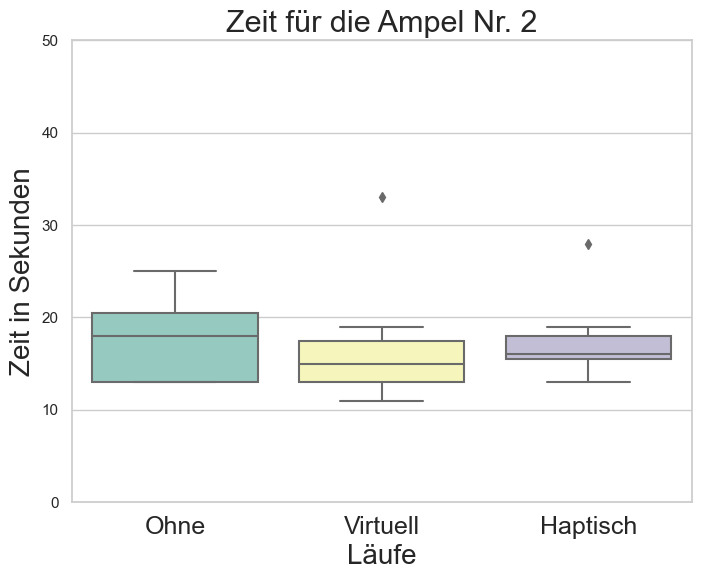

In [2]:
import numpy as np

def visualizeTime(data, nr, name, name2, limit):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))

    ax = sns.boxplot(data=data, palette="Set3")
    ax.set_ylim(0,limit)
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'], fontsize=fontsize)
    plt.xlabel("Läufe", fontsize = fontsizeLabel)
    plt.ylabel("Zeit in Sekunden", fontsize = fontsizeLabel)
    plt.title("Zeit für die " + name2 + " Nr. " + str(nr), fontsize= fontsizeHeader)
    plt.savefig('../Visualisierungen/zeiten_' + name + '_' + str(nr) + '.png', dpi=300)
    plt.show()

def analyseTime(ids, begin, end):
    timestocomplete = []
    for n in ids:
        #print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        
        startBridge_1_df = df.groupby([begin, end])
        for group_value, group_data in startBridge_1_df:
            if group_value == (True, False): #Begin of Bridge triggered, but end not
                starttime = group_data['TimeStamp_Unix'].min()
                endtime = group_data['TimeStamp_Unix'].max()
        
                timetocomplete = endtime - starttime
                timestocomplete.append(timetocomplete)
    return timestocomplete

#########################################################################################################

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,5,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped on bridge 1)
idsHaptic = [3,6,9,12,15,18,21,26] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)

timesref = analyseTime(idsReference, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')

max_len = max(len(timesref), len(timesvirt), len(timeshapt))

timesref.extend([np.nan] * (max_len - len(timesref)))
timesvirt.extend([np.nan] * (max_len - len(timesvirt)))
timeshapt.extend([np.nan] * (max_len - len(timeshapt)))

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 1, 'bruecke', 'Brücke', 100)

#########################################################################################################

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,5,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped on bridge 1)
idsHaptic = [3,6,9,12,15,18,21,26] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)

timesref = analyseTime(idsReference, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')

max_len = max(len(timesref), len(timesvirt), len(timeshapt))

timesref.extend([np.nan] * (max_len - len(timesref)))
timesvirt.extend([np.nan] * (max_len - len(timesvirt)))
timeshapt.extend([np.nan] * (max_len - len(timeshapt)))

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 2, 'bruecke', 'Brücke', 100)

#########################################################################################################

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,5,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped on bridge 1)
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)

timesref = analyseTime(idsReference, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')

max_len = max(len(timesref), len(timesvirt), len(timeshapt))

timesref.extend([np.nan] * (max_len - len(timesref)))
timesvirt.extend([np.nan] * (max_len - len(timesvirt)))
timeshapt.extend([np.nan] * (max_len - len(timeshapt)))

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 1, 'crossing', 'Ampel', 50)

#########################################################################################################

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped on bridge 1)
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)

timesref = analyseTime(idsReference, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 2, 'crossing', 'Ampel', 50)

#########################################################################################################


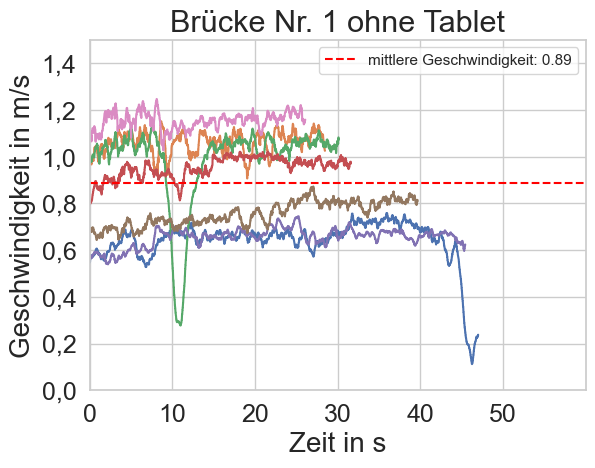

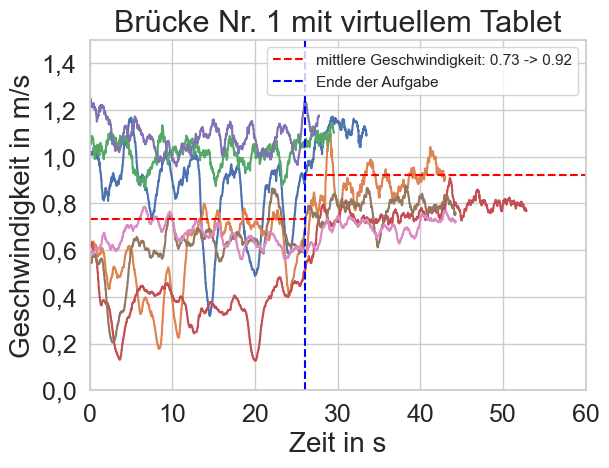

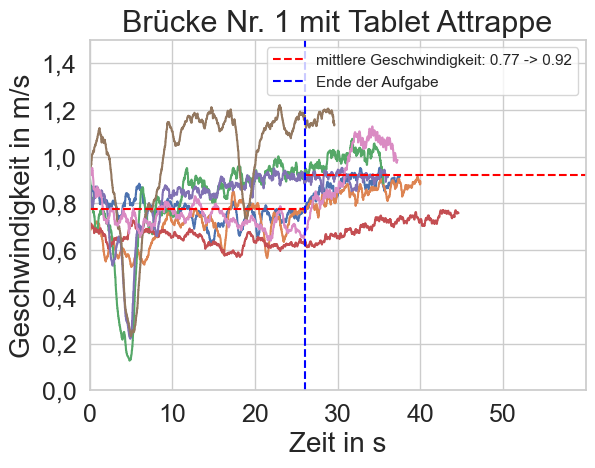

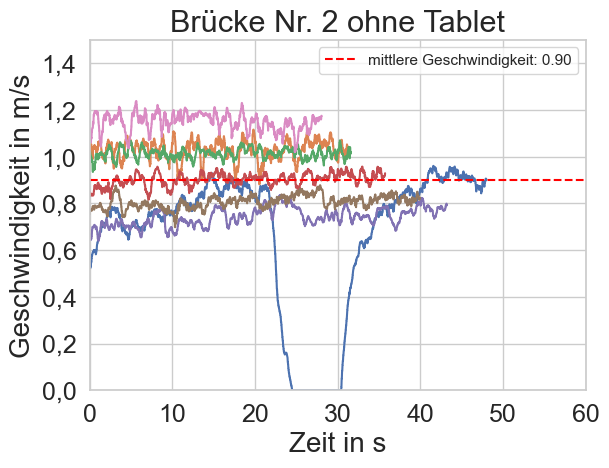

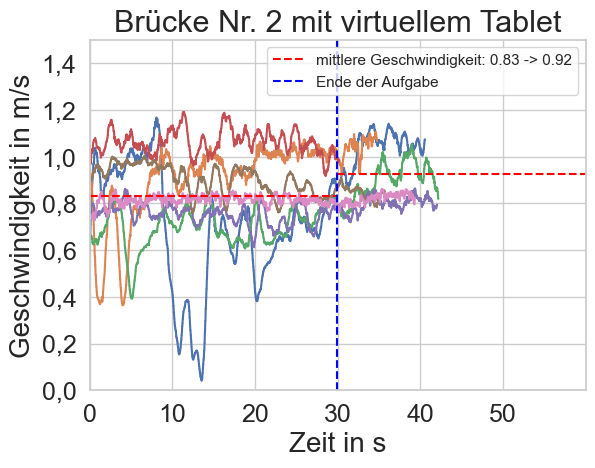

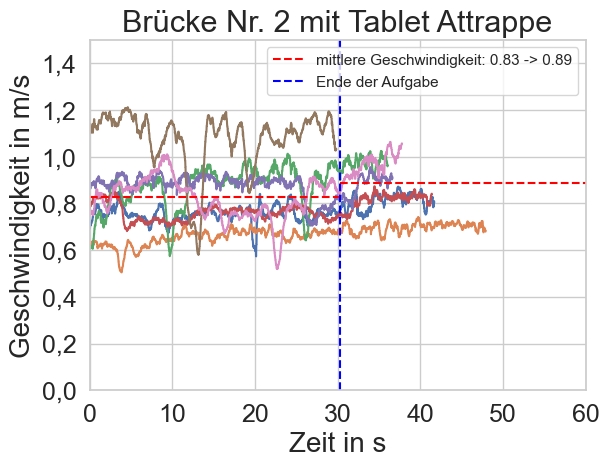

done


In [8]:
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

def analyseVelocity(ids, begin, end):
    velocities = [0,1,2,3,4,5,6,7]
    nr = 0
    
    for n in ids:
        #print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        
        startBridge_1_df = df.groupby([begin, end])
        for group_value, group_data in startBridge_1_df:
            if group_value == (True, False): #Begin of area triggered, but end not
                #sns.lineplot(data=group_data['TS_VRActor_MoveComp_MaxWalkSpeed'])
                velocities[nr] = group_data.copy()
                velocities[nr].reset_index(drop=True, inplace=True)
        nr += 1
    plt.show()
    return velocities
    
def mergeVelocity(velocities, headline, file):
    sync_value = 0
    sync_rows = velocities[0][velocities[0]['Tablet_menu_index'] == sync_value]
    index_cutoff = sync_rows.index[0]
   
    merged_df = pd.DataFrame()

    for i, df in enumerate(velocities, start=0):
        if not isinstance(df,pd.DataFrame):
            continue
        df.rename(columns={'TS_VRActor_MoveComp_MaxWalkSpeed': f'data_{i}'}, inplace=True)
        
        merged_df = pd.concat([merged_df, df], axis=1)
    
    sns.lineplot(data=merged_df['data_0'])
    sns.lineplot(data=merged_df['data_1'])
    sns.lineplot(data=merged_df['data_2'])
    sns.lineplot(data=merged_df['data_3'])
    sns.lineplot(data=merged_df['data_4'])
    sns.lineplot(data=merged_df['data_5'])
    ax = sns.lineplot(data=merged_df['data_6'])

    if index_cutoff == 0:
        index_cutoff_dif = 1
    else:
        index_cutoff_dif = index_cutoff
    mean = [0,1,2,3,4,5,6]
    mean[0] = merged_df.iloc[:index_cutoff]['data_0'].sum()/(index_cutoff_dif)
    mean[1] = merged_df.iloc[:index_cutoff]['data_1'].sum()/(index_cutoff_dif)
    mean[2] = merged_df.iloc[:index_cutoff]['data_2'].sum()/(index_cutoff_dif)
    mean[3] = merged_df.iloc[:index_cutoff]['data_3'].sum()/(index_cutoff_dif)
    mean[4] = merged_df.iloc[:index_cutoff]['data_4'].sum()/(index_cutoff_dif)
    mean[5] = merged_df.iloc[:index_cutoff]['data_5'].sum()/(index_cutoff_dif)
    mean[6] = merged_df.iloc[:index_cutoff]['data_6'].sum()/(index_cutoff_dif)
    
    meanofmeanbefore = np.mean(mean)
    #print(meanofmeanbefore)
    
    mean = [0,1,2,3,4,5,6]
    mean[0] = merged_df.iloc[index_cutoff:]['data_0'].sum()/(merged_df['data_0'].last_valid_index() - index_cutoff)
    mean[1] = merged_df.iloc[index_cutoff:]['data_1'].sum()/(merged_df['data_1'].last_valid_index() - index_cutoff)
    mean[2] = merged_df.iloc[index_cutoff:]['data_2'].sum()/(merged_df['data_2'].last_valid_index() - index_cutoff)
    mean[3] = merged_df.iloc[index_cutoff:]['data_3'].sum()/(merged_df['data_3'].last_valid_index() - index_cutoff)
    mean[4] = merged_df.iloc[index_cutoff:]['data_4'].sum()/(merged_df['data_4'].last_valid_index() - index_cutoff)
    mean[5] = merged_df.iloc[index_cutoff:]['data_5'].sum()/(merged_df['data_5'].last_valid_index() - index_cutoff)
    mean[6] = merged_df.iloc[index_cutoff:]['data_6'].sum()/(merged_df['data_6'].last_valid_index() - index_cutoff)
    
    if abs(mean[5]) == 0: #in one dataset, the person was faster over the bridge, than the task took, take same value
        mean[5] = merged_df.iloc[:index_cutoff]['data_5'].sum()/(index_cutoff_dif)
        
    meanofmeanafter = np.mean(mean)
    #print(meanofmeanafter)
    
    a = f'{(meanofmeanbefore/100):.2f}'
    b = f'{(meanofmeanafter/100):.2f}'
    
    visualizedThreashold = index_cutoff/6000
    
    plt.axhline(y=meanofmeanbefore, xmax=visualizedThreashold, color='red', linestyle='--')#, label='Mittelwert vorher')
    if math.isnan(meanofmeanbefore) or meanofmeanbefore == 0:
        plt.axhline(y=meanofmeanafter, xmin=visualizedThreashold, color='red', linestyle='--',
                    label='mittlere Geschwindigkeit: ' + b)
    else:
        plt.axhline(y=meanofmeanafter, xmin=visualizedThreashold, color='red', linestyle='--',
                label='mittlere Geschwindigkeit: ' + a + ' -> ' + b)
        plt.axvline(index_cutoff, color='blue', linestyle='--', label='Ende der Aufgabe')
    
    plt.legend()
    plt.title(headline, fontsize=fontsizeHeader)
    plt.xlabel('Zeit in s', fontsize=fontsizeLabel)
    plt.ylabel('Geschwindigkeit in m/s', fontsize=fontsizeLabel)

    plt.xticks(ticks=plt.xticks()[0], labels=[str(int(x / 100)) for x in plt.xticks()[0]], fontsize=fontsize)
    #Attention!!!: set manual labels because figure 6 made problems, since the dataset has such a low vertical distribution, so the automatic labels were in 0.1 steps from 0.4 to 1.3
    plt.yticks([0, 20, 40, 60, 80, 100, 120, 140], [str(y/100).replace('.',',') for y in [0, 20, 40, 60, 80, 100, 120, 140]], fontsize=fontsize)
    #plt.yticks(ticks=plt.yticks()[0], labels=[str(y / 100).replace('.',',') for y in plt.yticks()[0]], fontsize=fontsize)

    plt.xlim(0,6000)
    plt.ylim(0,150)
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.savefig('../Visualisierungen/' + file, dpi=300)
    plt.show()

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,5,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped after bridge 1)
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)
    
velocities = analyseVelocity(idsReference, 'TriggerBeginRun_Status', 'TriggerEndBridge1_Status')
mergeVelocity(velocities, 'Brücke Nr. 1 ohne Tablet', 'real/1 ohne Tablet.png')
velocities = analyseVelocity(idsVirtual, 'TriggerBeginRun_Status', 'TriggerEndBridge1_Status')
mergeVelocity(velocities, 'Brücke Nr. 1 mit virtuellem Tablet', 'virtuell/1 mit virtuellem Tablet.png')
velocities = analyseVelocity(idsHaptic, 'TriggerBeginRun_Status', 'TriggerEndBridge1_Status')
mergeVelocity(velocities, 'Brücke Nr. 1 mit Tablet Attrappe', 'haptisch/1 mit Tablet Attrappe.png')

idsReference = [1,4,7,10,13,16,19] # broken runs 22 (no dynamic run)
idsVirtual = [2,8,11,17,20,24,25] #broken runs 5 (stopped after light 1),14 (stopped after bridge 1)
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23 (no dynamic run),26 (stopped after bridge 2)

velocities = analyseVelocity(idsReference, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
mergeVelocity(velocities, 'Brücke Nr. 2 ohne Tablet', 'real/2 ohne Tablet.png')
velocities = analyseVelocity(idsVirtual, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
mergeVelocity(velocities, 'Brücke Nr. 2 mit virtuellem Tablet', 'virtuell/2 mit virtuellem Tablet.png')
velocities = analyseVelocity(idsHaptic, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
mergeVelocity(velocities, 'Brücke Nr. 2 mit Tablet Attrappe', 'haptisch/2 mit Tablet Attrappe.png')

print('done')